In [1]:
import pandas as pd
import altair as alt


<a id="4"></a>
# <span style="color:#1F618D;">*Data Cleaning and preview*</span>


In [2]:
# READING IN GENETIC DATA
data = pd.read_csv("TCGA_BRCA_tpm.tsv", sep="\t")

# READING CLINICAL DATA
clinical = pd.read_csv("brca_tcga_pan_can_atlas_2018_clinical_data_filtered.tsv", sep="\t")

## <span style="color:#7E9FB8;">Preview of data<span>

In [3]:
data.head()

,Ensembl_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,ENSG00000242268.2,2.136175,0.000000,1.366653,0.000000,0.000000,8.460189,0.000000,0.000000,0.000000,...,6.271042,2.655369,0.000000,0.000000,0.000000,0.000000,12.200121,2.400749,0.000000,1.455457
1,ENSG00000270112.3,0.444602,0.108543,0.379255,0.000000,0.000000,0.000000,0.126752,0.000000,0.000000,...,0.000000,0.092110,0.222683,0.000000,0.248376,0.000000,0.000000,0.000000,0.151089,0.201949
2,ENSG00000167578.15,120.772270,87.749001,75.417573,93.460292,188.027995,129.685657,127.839992,114.870865,97.754686,...,99.844261,103.076824,218.082323,92.036286,41.643751,178.095525,65.848070,89.621045,116.841950,119.689776
3,ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,130.195003,589.404468,97.898995,196.498809,96.495171,74.910318,89.468125,164.586674,109.453575,...,109.201664,124.731209,107.049049,77.411736,119.400389,95.149919,64.471363,126.679274,132.987996,293.296423


## <span style="color:#7E9FB8;">Preview of Clinical Data<span>

In [4]:
clinical.head()

,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Sex,Subtype,Tumor Type
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01,55,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Lobular Carcinoma
1,TCGA-3C-AALI,TCGA-3C-AALI-01,50,Invasive Breast Carcinoma,Female,BRCA_Her2,Infiltrating Ductal Carcinoma
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01,62,Invasive Breast Carcinoma,Female,BRCA_LumB,Infiltrating Ductal Carcinoma
3,TCGA-3C-AALK,TCGA-3C-AALK-01,52,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Ductal Carcinoma
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01,50,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Lobular Carcinoma


## <span style="color:#7E9FB8;">Counts of Samples per Subtype<span>

In [5]:
clinical_summary= clinical.groupby("Subtype").size().rename("Count").reset_index()
clinical_summary

,Subtype,Count
0,BRCA_Basal,171
1,BRCA_Her2,78
2,BRCA_LumA,499
3,BRCA_LumB,197
4,BRCA_Normal,36


In [6]:
alt.Chart(clinical_summary).mark_bar().encode(
    alt.X("Subtype"),
    alt.Y("Count"),
    color= "Subtype",
    tooltip= ["Subtype", "Count"]
).properties(
    title="Number Of Samples per Subtype",
    width=150,
    height=300
)

alt.Chart(...)

<a id="4"></a>
## <span style="color:#7E9FB8;">*Transposing the Data*</span>

In order to perform some modelling on the data, we need the genes as columns. The cell below transposes the data and previews the head of the dataset.
 

In [7]:
transposed = data.set_index(
    'Ensembl_ID').T.reset_index().rename_axis(None,axis=1).rename(columns= {"index":"Ensembl_ID"})
transposed.head()


,Ensembl_ID,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,TCGA-E9-A1NI-01A,2.136175,0.444602,120.772270,0.0,130.195003,367.648485,0.0,8.566831,6761.703735,...,0.0,1.689495,0.0,0.000000,0.00000,384.642854,7.126486,0.0,16.771294,0.0
1,TCGA-A1-A0SP-01A,0.000000,0.108543,87.749001,0.0,589.404468,355.229767,0.0,0.371266,3764.978655,...,0.0,0.000000,0.0,2.518887,1.30379,487.833301,2.763256,0.0,53.432799,0.0
2,TCGA-BH-A1EU-11A,1.366653,0.379255,75.417573,0.0,97.898995,318.183814,0.0,0.972918,4626.216499,...,0.0,0.926471,0.0,2.200280,0.00000,235.837396,10.191347,0.0,18.240508,0.0
3,TCGA-A8-A06X-01A,0.000000,0.000000,93.460292,0.0,196.498809,831.383749,0.0,0.053586,4979.030166,...,0.0,2.806509,0.0,0.000000,0.00000,512.670233,8.862807,0.0,10.341847,0.0
4,TCGA-E2-A14T-01A,0.000000,0.000000,188.027995,0.0,96.495171,420.292489,0.0,2.674759,6611.584463,...,0.0,0.000000,0.0,2.722067,0.00000,598.908985,1.548373,0.0,3.834774,0.0


## <span style="color:#7E9FB8;">Cleaning Up Clinical Data</span>
The following were performed on the clinical data in the following cell to prepare it for Merging with the genetic sequencing data
- renamed `Sample ID` to `Ensemble_Id`
- Added "A" at the end of the string in the `Ensembl_ID` column

In [8]:
clinical= clinical.rename(columns={"Sample ID": "Ensembl_ID"})
clinical.Ensembl_ID+="A"
clinical.head()

,Patient ID,Ensembl_ID,Diagnosis Age,Cancer Type,Sex,Subtype,Tumor Type
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,55,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Lobular Carcinoma
1,TCGA-3C-AALI,TCGA-3C-AALI-01A,50,Invasive Breast Carcinoma,Female,BRCA_Her2,Infiltrating Ductal Carcinoma
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01A,62,Invasive Breast Carcinoma,Female,BRCA_LumB,Infiltrating Ductal Carcinoma
3,TCGA-3C-AALK,TCGA-3C-AALK-01A,52,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Ductal Carcinoma
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01A,50,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Lobular Carcinoma


## <span style="color:#7E9FB8;">Merging Clinical Data With Our Data</span>

In [9]:
# MERGING CLINICAL DATA AND GENE EXPRESSION DATA
final_data = pd.merge(transposed,
    clinical,
    how="inner",
    on="Ensembl_ID")
final_data.head()

,Ensembl_ID,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3,Patient ID,Diagnosis Age,Cancer Type,Sex,Subtype,Tumor Type
0,TCGA-E9-A1NI-01A,2.136175,0.444602,120.772270,0.0,130.195003,367.648485,0.0,8.566831,6761.703735,...,7.126486,0.0,16.771294,0.0,TCGA-E9-A1NI,51,Invasive Breast Carcinoma,Female,BRCA_LumB,Mixed Histology (NOS)
1,TCGA-A1-A0SP-01A,0.000000,0.108543,87.749001,0.0,589.404468,355.229767,0.0,0.371266,3764.978655,...,2.763256,0.0,53.432799,0.0,TCGA-A1-A0SP,40,Invasive Breast Carcinoma,Female,BRCA_Basal,Infiltrating Ductal Carcinoma
2,TCGA-A8-A06X-01A,0.000000,0.000000,93.460292,0.0,196.498809,831.383749,0.0,0.053586,4979.030166,...,8.862807,0.0,10.341847,0.0,TCGA-A8-A06X,77,Invasive Breast Carcinoma,Female,BRCA_LumB,Infiltrating Ductal Carcinoma
3,TCGA-E2-A14T-01A,0.000000,0.000000,188.027995,0.0,96.495171,420.292489,0.0,2.674759,6611.584463,...,1.548373,0.0,3.834774,0.0,TCGA-E2-A14T,52,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Ductal Carcinoma
4,TCGA-AC-A8OS-01A,8.460189,0.000000,129.685657,0.0,74.910318,327.080490,0.0,0.803039,2672.826689,...,23.907401,0.0,17.712450,0.0,TCGA-AC-A8OS,71,Invasive Breast Carcinoma,Female,BRCA_LumA,Infiltrating Lobular Carcinoma


## <span style="color:#7E9FB8;">Keeping Only The Subtype And The Data</span>

In [10]:
df = final_data.drop(columns=["Ensembl_ID", "Patient ID", 
                              "Diagnosis Age","Cancer Type",
                              "Sex", "Tumor Type"]).set_index("Subtype").reset_index().dropna()
df.head()

,Subtype,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,BRCA_LumB,2.136175,0.444602,120.772270,0.0,130.195003,367.648485,0.0,8.566831,6761.703735,...,0.0,1.689495,0.0,0.000000,0.000000,384.642854,7.126486,0.0,16.771294,0.0
1,BRCA_Basal,0.000000,0.108543,87.749001,0.0,589.404468,355.229767,0.0,0.371266,3764.978655,...,0.0,0.000000,0.0,2.518887,1.303790,487.833301,2.763256,0.0,53.432799,0.0
2,BRCA_LumB,0.000000,0.000000,93.460292,0.0,196.498809,831.383749,0.0,0.053586,4979.030166,...,0.0,2.806509,0.0,0.000000,0.000000,512.670233,8.862807,0.0,10.341847,0.0
3,BRCA_LumA,0.000000,0.000000,188.027995,0.0,96.495171,420.292489,0.0,2.674759,6611.584463,...,0.0,0.000000,0.0,2.722067,0.000000,598.908985,1.548373,0.0,3.834774,0.0
4,BRCA_LumA,8.460189,0.000000,129.685657,0.0,74.910318,327.080490,0.0,0.803039,2672.826689,...,0.0,1.338229,0.0,14.982784,1.410032,434.696691,23.907401,0.0,17.712450,0.0


## <span style="color:#7E9FB8;">Subtype Samples Counts of The Final Cleaned Dataset</span>

In [11]:
df.groupby("Subtype").size().reset_index().rename(columns={0:"Count"})

,Subtype,Count
0,BRCA_Basal,168
1,BRCA_Her2,77
2,BRCA_LumA,490
3,BRCA_LumB,192
4,BRCA_Normal,35


In [12]:
to_plot = df[["Subtype", "ENSG00000242268.2", "ENSG00000270112.3"]]
to_plot.columns= ['Subtype', 'gene_one', 'gene_two']

alt.Chart(to_plot).mark_circle().encode(
    alt.X("gene_one", scale= alt.Scale(zero=False)),
    alt.Y("gene_two", scale= alt.Scale(zero=False)), 
    color= "Subtype",
    size= "gene_one"
).facet(
    facet="Subtype",
    columns=2
)

alt.FacetChart(...)


<a id="5"></a>
# <span style="color:#1F618D;">*Machine Learning Models*</span>

In [13]:
y = df.Subtype
X = df.drop("Subtype", axis=1)

## <span style="color:#7E9FB8;">Splitting Data Into Training And Testing Sets</span>

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Multi Modal Networks

Epoch [1/50], Loss: 1.1898
Epoch [2/50], Loss: 0.5303
Epoch [3/50], Loss: 0.3280
Epoch [4/50], Loss: 0.1676
Epoch [5/50], Loss: 0.0760
Epoch [6/50], Loss: 0.0405
Epoch [7/50], Loss: 0.0363
Epoch [8/50], Loss: 0.0232
Epoch [9/50], Loss: 0.0212
Epoch [10/50], Loss: 0.0243
Epoch [11/50], Loss: 0.0505
Epoch [12/50], Loss: 0.0386
Epoch [13/50], Loss: 0.0586
Epoch [14/50], Loss: 0.0310
Epoch [15/50], Loss: 0.0433
Epoch [16/50], Loss: 0.0190
Epoch [17/50], Loss: 0.0136
Epoch [18/50], Loss: 0.0163
Epoch [19/50], Loss: 0.0177
Epoch [20/50], Loss: 0.0183
Epoch [21/50], Loss: 0.0201
Epoch [22/50], Loss: 0.0040
Epoch [23/50], Loss: 0.0153
Epoch [24/50], Loss: 0.0716
Epoch [25/50], Loss: 0.0752
Epoch [26/50], Loss: 0.0216
Epoch [27/50], Loss: 0.0806
Epoch [28/50], Loss: 0.0130
Epoch [29/50], Loss: 0.0113
Epoch [30/50], Loss: 0.0105
Epoch [31/50], Loss: 0.0088
Epoch [32/50], Loss: 0.0295
Epoch [33/50], Loss: 0.0383
Epoch [34/50], Loss: 0.0406
Epoch [35/50], Loss: 0.0701
Epoch [36/50], Loss: 0.0460
E

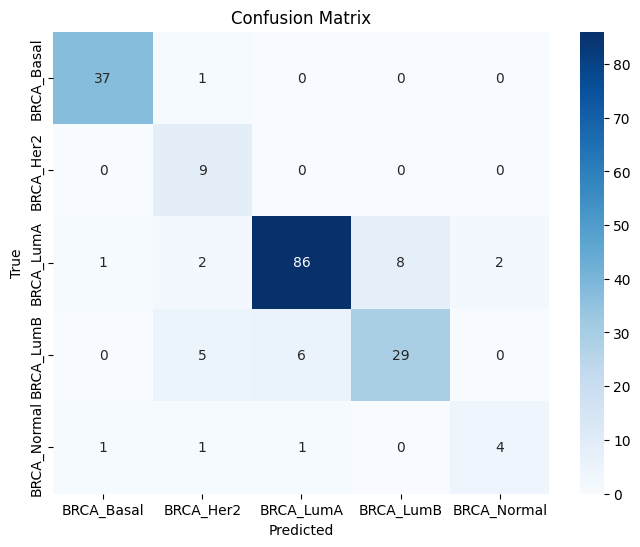

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing the final_data as per the previous logic
mm_df = final_data.drop(columns=["Ensembl_ID", "Patient ID", "Cancer Type"]).set_index("Subtype").reset_index().dropna()

# DATA PREPROCESSING
# Encoding Subtypes
le = LabelEncoder()
mm_df['Subtype'] = le.fit_transform(df['Subtype'])

# Separate Gene Expression and Clinical Data
clinical_cols = ["Diagnosis Age", "Sex", "Tumor Type"]
gene_expression_cols = [col for col in mm_df.columns if col.startswith("ENSG")]

# Convert categorical columns to numeric using Label Encoding
mm_label_encoder = LabelEncoder()
mm_df['Sex'] = mm_label_encoder.fit_transform(mm_df['Sex'])
mm_df['Tumor Type'] = mm_label_encoder.fit_transform(mm_df['Tumor Type'])

# Ensure 'Diagnosis Age' is numeric (if not already)
mm_df['Diagnosis Age'] = pd.to_numeric(mm_df['Diagnosis Age'], errors='coerce')

# Fill any NaN values with 0 (or you can impute them differently if needed)
mm_df = mm_df.fillna(0)

clinical_data = mm_df[clinical_cols]
gene_data = mm_df[gene_expression_cols]

# Standardizing Gene Expression Data
scaler = StandardScaler()
gene_data = pd.DataFrame(scaler.fit_transform(gene_data), columns=gene_expression_cols)

# Combine Preprocessed Data
mm_y = mm_df['Subtype']
mm_X_clinical = torch.tensor(clinical_data.values, dtype=torch.float32)
mm_X_gene = torch.tensor(gene_data.values, dtype=torch.float32)
mm_y = torch.tensor(mm_y.values, dtype=torch.long)

# Train-Test Split
X_clinical_train, X_clinical_test, X_gene_train, X_gene_test, y_train, y_test = train_test_split(
    mm_X_clinical, mm_X_gene, mm_y, test_size=0.2, random_state=0
)

# Convert to PyTorch Datasets and Loaders
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_clinical_train, X_gene_train, y_train)
test_dataset = TensorDataset(X_clinical_test, X_gene_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# MODEL ARCHITECTURE
class MultiModalNN(nn.Module):
    def __init__(self, clinical_input_size, gene_input_size, num_classes):
        super(MultiModalNN, self).__init__()
        
        # Clinical Data Branch
        self.clinical_net = nn.Sequential(
            nn.Linear(clinical_input_size, 64),
            nn.ReLU(),

            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        
        # Gene Expression Data Branch
        self.gene_net = nn.Sequential(
            nn.Linear(gene_input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        
        # Fusion Layer
        self.fusion = nn.Sequential(
            nn.Linear(32 + 64, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )
        
    def forward(self, clinical_data, gene_data):
        clinical_out = self.clinical_net(clinical_data)
        gene_out = self.gene_net(gene_data)
        
        # Concatenate outputs
        combined = torch.cat((clinical_out, gene_out), dim=1)
        output = self.fusion(combined)
        return output

# Initialize Model
clinical_input_size = X_clinical_train.shape[1]
gene_input_size = X_gene_train.shape[1]
num_classes = len(le.classes_)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mm_model = MultiModalNN(clinical_input_size, gene_input_size, num_classes).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mm_model.parameters(), lr=0.001)

# TRAINING LOOP
epochs = 50
start_time = time.time()

for epoch in range(epochs):
    mm_model.train()
    total_loss = 0
    
    for X_clinical_batch, X_gene_batch, y_batch in train_loader:
        X_clinical_batch, X_gene_batch, y_batch = (
            X_clinical_batch.to(device),
            X_gene_batch.to(device),
            y_batch.to(device),
        )
        
        optimizer.zero_grad()
        outputs = mm_model(X_clinical_batch, X_gene_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

# Training Time
mm_end_time = time.time()
mm_training_time = mm_end_time - start_time
print(f"\nTotal Training Time: {mm_training_time:.2f} seconds")

# EVALUATION
mm_model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for X_clinical_batch, X_gene_batch, y_batch in test_loader:
        X_clinical_batch, X_gene_batch, y_batch = (
            X_clinical_batch.to(device),
            X_gene_batch.to(device),
            y_batch.to(device),
        )
        
        outputs = mm_model(X_clinical_batch, X_gene_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

# Calculate Accuracy and F1-Score
mm_accuracy = accuracy_score(y_true, y_pred)
mm_f1 = f1_score(y_true, y_pred, average='weighted')  # Weighted F1-score for imbalanced classes
print(f"\nTest Accuracy: {mm_accuracy * 100:.2f}%")
print(f"Test F1-Score: {mm_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_.astype(str)))

# Confusion Matrix
mm_cm = confusion_matrix(y_true, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

 # Graph Convolutional Networks (GCNs)

In [17]:
import time
import torch
import torch.nn.functional as F
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import kneighbors_graph
import numpy as np
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Step 1: Preprocess Data
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
gcn_X_tensor = torch.tensor(X_scaled, dtype=torch.float)
gcn_y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Step 2: Construct k-NN Graph
# Build adjacency matrix using k-nearest neighbors
k = 10  # Number of neighbors
adjacency_matrix = kneighbors_graph(X_scaled, n_neighbors=k, mode='connectivity', include_self=True)
edge_index = torch.tensor(np.array(adjacency_matrix.nonzero()), dtype=torch.long)

# Create graph data object
graph_data = Data(x=gcn_X_tensor, edge_index=edge_index, y=gcn_y_tensor)

# Step 3: Define GCN Model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.5):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout = torch.nn.Dropout(dropout)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Step 4: Train-Test Split
n_samples = gcn_X_tensor.size(0)
train_mask, test_mask = train_test_split(range(n_samples), test_size=0.2, random_state=42)

train_data = graph_data.clone()
test_data = graph_data.clone()

train_data.train_mask = torch.tensor(train_mask, dtype=torch.long)
test_data.test_mask = torch.tensor(test_mask, dtype=torch.long)

# Step 5: Model Setup
input_dim = gcn_X_tensor.size(1)
hidden_dim = 64  # Number of hidden units
output_dim = len(label_encoder.classes_)

gcn_model = GCN(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.001, weight_decay=5e-4)

# Step 6: Train the Model
def train(model, data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test(model, data):
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    accuracy = correct / len(data.test_mask)
    return accuracy, pred[data.test_mask]

# Training Loop with Early Stopping
best_loss = float('inf')
patience = 60  # Increase patience to allow more epochs before early stopping
max_epochs = 300  # Train for more epochs if necessary
counter = 0

# Start measuring training time
gcn_start_time = time.time()

for epoch in range(1, max_epochs + 1):
    loss = train(gcn_model, train_data)
    val_acc, _ = test(gcn_model, test_data)

    if loss < best_loss:
        best_loss = loss
        counter = 0
        torch.save(gcn_model.state_dict(), "best_model.pth")
    else:
        counter += 1

    if counter >= patience:
        print("Early stopping triggered.")
        break

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {val_acc:.4f}")

# End measuring training time
gcn_end_time = time.time()
gcn_training_time = gcn_end_time - gcn_start_time

# Load Best Model with weights_only=True to avoid warning
gcn_model.load_state_dict(torch.load("best_model.pth", map_location=torch.device('cpu'), weights_only=True))

# Final Test Accuracy and F1-Score Calculation
gcn_final_accuracy, gcn_predictions = test(gcn_model, test_data)
gcn_f1 = f1_score(test_data.y[test_data.test_mask].cpu(), gcn_predictions.cpu(), average='weighted')

# Step 7: Computational Efficiency - Inference Time
gcn_start_inference_time = time.time()
_ = gcn_model(test_data)
gcn_end_inference_time = time.time()
gcn_inference_time = gcn_end_inference_time - gcn_start_inference_time

# Output Results
print(f"Final Test Accuracy: {gcn_final_accuracy:.4f}")
print(f"Final F1-Score (Weighted): {gcn_f1:.4f}")
print(f"Training Time: {gcn_training_time:.4f} seconds")
print(f"Inference Time: {gcn_inference_time:.4f} seconds")


Epoch 10, Loss: 5.1278, Test Accuracy: 0.7150
Epoch 20, Loss: 2.8186, Test Accuracy: 0.6788
Epoch 30, Loss: 1.6711, Test Accuracy: 0.6736
Epoch 40, Loss: 0.6494, Test Accuracy: 0.6684
Epoch 50, Loss: 0.4506, Test Accuracy: 0.6528
Epoch 60, Loss: 0.3031, Test Accuracy: 0.6736
Epoch 70, Loss: 0.1880, Test Accuracy: 0.6736
Epoch 80, Loss: 0.1799, Test Accuracy: 0.6736
Epoch 90, Loss: 0.1275, Test Accuracy: 0.6736
Epoch 100, Loss: 0.1602, Test Accuracy: 0.6736
Epoch 110, Loss: 0.1419, Test Accuracy: 0.6736
Epoch 120, Loss: 0.1284, Test Accuracy: 0.6839
Epoch 130, Loss: 0.1074, Test Accuracy: 0.6736
Epoch 140, Loss: 0.0765, Test Accuracy: 0.6684
Epoch 150, Loss: 0.0637, Test Accuracy: 0.6788
Epoch 160, Loss: 0.0836, Test Accuracy: 0.6736
Early stopping triggered.
Final Test Accuracy: 0.6684
Final F1-Score (Weighted): 0.6620
Training Time: 157.8228 seconds
Inference Time: 0.0853 seconds


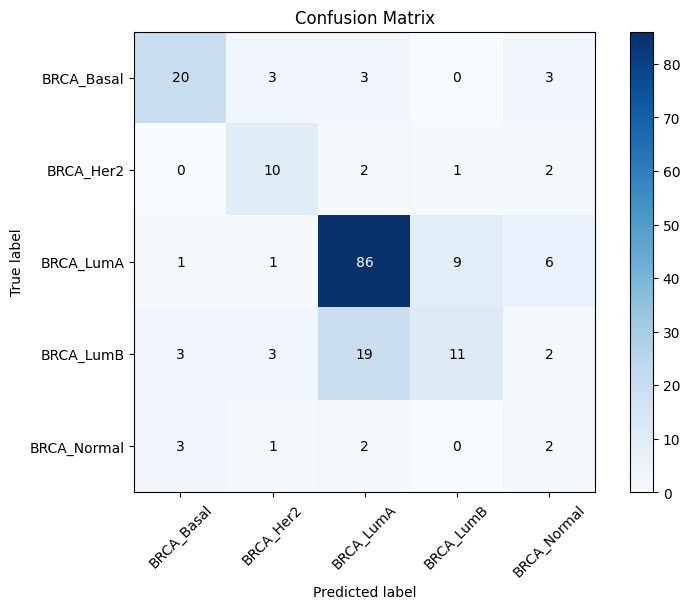

Classification Report:
              precision    recall  f1-score   support

  BRCA_Basal       0.74      0.69      0.71        29
   BRCA_Her2       0.56      0.67      0.61        15
   BRCA_LumA       0.77      0.83      0.80       103
   BRCA_LumB       0.52      0.29      0.37        38
 BRCA_Normal       0.13      0.25      0.17         8

    accuracy                           0.67       193
   macro avg       0.54      0.55      0.53       193
weighted avg       0.67      0.67      0.66       193



In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
true_labels = test_data.y[test_data.test_mask].cpu().numpy()
predicted_labels = gcn_predictions.cpu().numpy()

conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot and display
plot_confusion_matrix(conf_matrix, classes=label_encoder.classes_)
plt.show()
target_names = label_encoder.classes_.astype(str)  # Convert to string if necessary
print("Classification Report:")
print(classification_report(test_data.y[test_data.test_mask].cpu(), gcn_predictions.cpu(), target_names=target_names))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Graph Transformer Model

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from torch.utils.data import DataLoader, TensorDataset

# Graph Transformer model definition with improvements
class GraphTransformer(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_heads, num_layers, dropout=0.1):
        super(GraphTransformer, self).__init__()

        # Ensure input_dim is divisible by num_heads
        if input_dim % num_heads != 0:
            print(f"Adjusting input_dim ({input_dim}) to be divisible by num_heads ({num_heads})")
            input_dim = (input_dim // num_heads) * num_heads  # Adjust to nearest divisible value
        self.input_dim = input_dim

        # Transformer Encoder Layer with Layer Normalization and GELU activation
        self.attn_layer = nn.TransformerEncoderLayer(
            d_model=input_dim,  # input feature dimension
            nhead=num_heads,    # number of attention heads
            dim_feedforward=hidden_dim,  # hidden layer dimension
            dropout=dropout,    # dropout rate
            activation='gelu'   # Using GELU activation
        )
        self.transformer_encoder = nn.TransformerEncoder(self.attn_layer, num_layers=num_layers)
        
        # Output layer
        self.fc_out = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        # Apply transformer encoder
        x = self.transformer_encoder(x)
        
        # Output layer
        x = self.fc_out(x)
        return x

# Dimensionality reduction (PCA)
pca = PCA(n_components=64)  # Reduce to 64 dimensions (you can adjust this number)
X_tensor_reduced = pca.fit_transform(gcn_X_tensor)

# Update input_dim after PCA
input_dim = X_tensor_reduced.shape[1]
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())
# Ensure input_dim is divisible by num_heads
num_heads = 2  # Adjust num_heads to 2 to reduce memory consumption
if input_dim % num_heads != 0:
    print(f"Adjusting input_dim ({input_dim}) to be divisible by num_heads ({num_heads})")
    input_dim = (input_dim // num_heads) * num_heads  # Adjust to nearest divisible value

# Now initialize the model
hidden_dim = 64  # Reduce hidden dimension
num_layers = 2  # Reduce number of layers
output_dim = 5  # Binary classification
model = GraphTransformer(input_dim, hidden_dim, output_dim, num_heads, num_layers)

# Optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tensor_reduced, gcn_y_tensor, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create a dataset and DataLoader for batching
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)  # Adjust batch size if needed

# Training function with early stopping
def train_model(model, train_loader, X_test, y_test, epochs=200, patience=10):
    best_accuracy = 0
    patience_counter = 0
    best_model_wts = None
    start_time = time.time()
    
    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            
            # Compute loss and backpropagate
            loss = criterion(outputs.view(-1, output_dim), targets)
            loss.backward()
            optimizer.step()

        # Evaluate model
        model.eval()
        with torch.no_grad():
            predictions = model(X_test).argmax(dim=1)
            accuracy = accuracy_score(y_test.cpu(), predictions.cpu())
            f1 = f1_score(y_test.cpu(), predictions.cpu(), average='weighted')

        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")
        
        # Early stopping condition
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_wts = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}.")
            break
    
    # Load the best model weights
    model.load_state_dict(best_model_wts)
    
    # Measure time taken for training
    elapsed_time = time.time() - start_time
    print(f"Training complete in {elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s")
    
    # Final evaluation on the test set
    model.eval()
    with torch.no_grad():
        predictions = model(X_test).argmax(dim=1)
        accuracy = accuracy_score(y_test.cpu(), predictions.cpu())
        f1 = f1_score(y_test.cpu(), predictions.cpu(), average='weighted')

    print(f"Final Test Accuracy: {accuracy:.4f}")
    print(f"Final F1-score: {f1:.4f}")

    return accuracy, f1

# Train the model
gt_accuracy, gt_f1 = train_model(model, train_loader, X_test_tensor, y_test_tensor)
gt_model = model
# Measure computational efficiency
print(f"Training Accuracy: {gt_accuracy:.4f}")
print(f"F1-score: {gt_f1:.4f}")


Unique values in y_train: ['BRCA_Basal' 'BRCA_LumA' 'BRCA_LumB' 'BRCA_Her2' 'BRCA_Normal']
Unique values in y_test: ['BRCA_LumA' 'BRCA_Basal' 'BRCA_LumB' 'BRCA_Her2' 'BRCA_Normal']


C:\Users\ahmed\.pyenv\pyenv-win\versions\3.11.7\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\ahmed\AppData\Local\Temp\ipykernel_37620\665407418.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.long)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_37620\665407418.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y

Epoch 1, Loss: 1.9514, Test Accuracy: 0.5389, F1-score: 0.5100
Epoch 2, Loss: 1.0453, Test Accuracy: 0.5648, F1-score: 0.4466
Epoch 3, Loss: 1.9205, Test Accuracy: 0.5544, F1-score: 0.4202
Epoch 4, Loss: 2.4848, Test Accuracy: 0.5855, F1-score: 0.4771
Epoch 5, Loss: 1.1476, Test Accuracy: 0.6477, F1-score: 0.5721
Epoch 6, Loss: 0.6050, Test Accuracy: 0.6891, F1-score: 0.6267
Epoch 7, Loss: 1.8995, Test Accuracy: 0.7098, F1-score: 0.6493
Epoch 8, Loss: 1.1019, Test Accuracy: 0.7254, F1-score: 0.6665
Epoch 9, Loss: 0.4099, Test Accuracy: 0.7358, F1-score: 0.6814
Epoch 10, Loss: 0.1206, Test Accuracy: 0.7565, F1-score: 0.7133
Epoch 11, Loss: 0.6630, Test Accuracy: 0.7617, F1-score: 0.7238
Epoch 12, Loss: 0.1363, Test Accuracy: 0.7772, F1-score: 0.7471
Epoch 13, Loss: 0.2934, Test Accuracy: 0.7668, F1-score: 0.7356
Epoch 14, Loss: 0.1172, Test Accuracy: 0.7772, F1-score: 0.7474
Epoch 15, Loss: 0.1999, Test Accuracy: 0.7772, F1-score: 0.7503
Epoch 16, Loss: 0.4990, Test Accuracy: 0.7720, F1

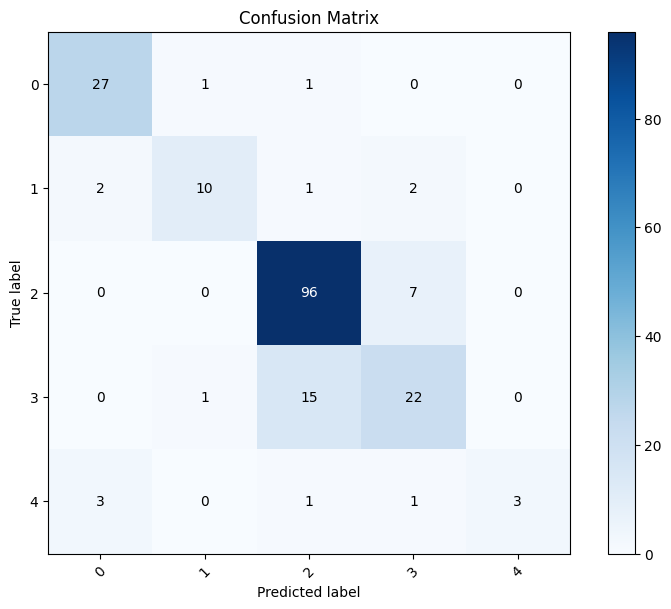

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.83      0.67      0.74        15
           2       0.84      0.93      0.88       103
           3       0.69      0.58      0.63        38
           4       1.00      0.38      0.55         8

    accuracy                           0.82       193
   macro avg       0.84      0.70      0.74       193
weighted avg       0.82      0.82      0.81       193



In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions for confusion matrix
gt_model.eval()
with torch.no_grad():
    predictions = gt_model(X_test_tensor).argmax(dim=1)

true_labels = y_test_tensor.cpu().numpy()
predicted_labels = predictions.cpu().numpy()

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
def plot_confusion_matrix(cm, class_names, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Print numbers in each cell
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, class_names=[str(c) for c in np.unique(y_test_tensor.cpu().numpy())])
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=[str(c) for c in np.unique(y_test_tensor.cpu().numpy())]))


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

<a id="6"></a>
# <span style="color:#1F618D;">Random Forest</span>

## <span style="color:#7E9FB8;">Choosing the optimal muximum tree depth from range 1 to 20</span>

In [23]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import accuracy_score

max_depth_best = []
for i in range(1,20):
    clf = rf(max_depth=i, random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    max_depth_best.append([i, accuracy_score(y_test, y_pred)])
max_depth = pd.DataFrame(max_depth_best, columns= ["max_depth", "Accuracy"])
max_depth

,max_depth,Accuracy
0,1,0.704663
1,2,0.740933
2,3,0.787565
3,4,0.839378
4,5,0.839378
5,6,0.829016
6,7,0.854922
7,8,0.844560
8,9,0.844560
9,10,0.860104


In [24]:
max_depth_chart= alt.Chart(max_depth).mark_line().encode(
    alt.X("max_depth", scale= alt.Scale(zero=False)),
    alt.Y("Accuracy", scale= alt.Scale(zero=False)), 
    tooltip= ["max_depth", "Accuracy"]
).properties(
    title="Random Forest Acuracy vs Max Depth"
)
max_depth_chart

alt.Chart(...)

In the output above, we see that in the range the best level of depth of trees that bring the best output is 10, 11 and 12. therefore, we will train our model with the max_depth parameter =  10

## <span style="color:#7E9FB8;">Choosing the Optimal n_estimators from range (10,200)</span>

In [25]:
## FINDING THE BEST N_ESTIMATOR
n_estimators=[]
for i in range(10,200):
    print(i)
    clf= rf(max_depth= 10, n_estimators=i, random_state=0)
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    n_estimators.append([i, accuracy_score(y_test, y_pred)])

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [26]:

n_estimate = pd.DataFrame(n_estimators, columns= ["n_estimator", "Accuracy"])
estimate_chart = alt.Chart(n_estimate).mark_line().encode(
    alt.X("n_estimator", scale= alt.Scale(zero=False)),
    alt.Y("Accuracy", scale= alt.Scale(zero=False)),
    tooltip=['n_estimator', "Accuracy"]
).properties(
    title="Random Forest Acuracy vs n_estimator"
)
max_depth_chart|estimate_chart

alt.HConcatChart(...)

In [27]:
#The Optimal n_estimator
n_estimate.loc[n_estimate["Accuracy"].idxmax()]

n_estimator    99.000000
Accuracy        0.865285
Name: 89, dtype: float64

From the series above, we see that 0.865 is the highest score and the best n_estimator is 99. 

## <span style="color:#7E9FB8;">Training the random Forest Model With The Hyperparameters Obtained Above</span>

In [28]:
rf_model = rf(max_depth=10, n_estimators= 99, random_state=0)
rf_model.fit(X_train, y_train)

#Predicting on Testing Set

y_pred= rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8652849740932642

In [47]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set using the optimized Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Calculate F1 score and accuracy
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')  # Adjust the `average` parameter as needed
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Display the F1 score and accuracy
print(f"F1 Score (Random Forest): {f1_rf}")
print(f"Accuracy (Random Forest): {accuracy_rf}")


F1 Score (Random Forest): 0.8456850167771308
Accuracy (Random Forest): 0.8652849740932642


## <span style="color:#7E9FB8;">Random Forest Classifier Confusion Matrix</span>

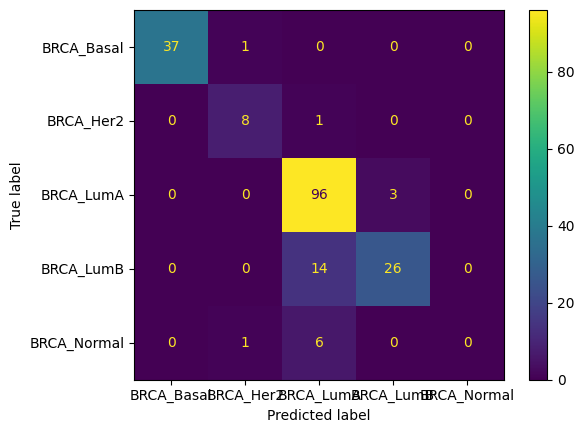

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_pred, labels= rf_model.classes_)
ConfusionMatrixDisplay(conf_mat, display_labels=rf_model.classes_).plot()

## <span style="color:#7E9FB8;">Random Forest Observations</span>
- The model is terrible with predicting `BRCA_Normal`. This makes sence given that we have very few samples of this subtype.
- The model is having problems with sepparating between `BRCA_LumA` and `BRCA_LumB`

## <span style="color:#7E9FB8;">Feature Importances</span>

Having built the Random Forest Model, we will now look at the most important genes in the classification of our gene subtypes. Since there are many genes in the model, we will only look at the 10 most important ones. 

In [30]:
sorted_idx = (-rf_model.feature_importances_).argsort()[:10]
feature_data = pd.DataFrame({"Feature" : X.columns[sorted_idx], "Importance":  rf_model.feature_importances_[sorted_idx] }).sort_values(by="Importance", ascending= False)
feature_data["Feature Names"]= [ "DRAIC", "TTC6", "SLC7A13", "DNAI7", "CCNB2", "CENPA", "ESR1", "RAB6C", "CDC20",  "CCNE1"]
feature_data

,Feature,Importance,Feature Names
0,ENSG00000245750.6,0.009603,DRAIC
1,ENSG00000139865.15,0.006070,TTC6
2,ENSG00000164893.7,0.005241,SLC7A13
3,ENSG00000118307.17,0.005187,DNAI7
4,ENSG00000157456.6,0.005174,CCNB2
5,ENSG00000115163.13,0.005155,CENPA
6,ENSG00000091831.20,0.005129,ESR1
7,ENSG00000222014.5,0.004514,RAB6C
8,ENSG00000117399.12,0.004496,CDC20
9,ENSG00000105173.12,0.004393,CCNE1


In [31]:
alt.Chart(feature_data).mark_bar().encode(
    y= alt.Y("Feature Names", sort=alt.EncodingSortField(field="Importance", op="count", order='ascending'), title="Gene"),
    x=alt.X('Importance:Q'),
    color= alt.Color("Feature Names", title= "Gene", legend= None),
    tooltip = ["Feature Names", "Importance"]
)

alt.Chart(...)

<a id="7"></a>
# <span style="color:#1F618D;">K Nearest Neighbors Model</span>

## <span style="color:#7E9FB8;">Finding The Optimal Number of Neighbors in The Range (1,20) </span>

In [32]:
from sklearn.neighbors import KNeighborsClassifier as knn

neighbors = []

for i in range(1,20):
    kclass= knn(n_neighbors=i)
    kclass.fit(X_train, y_train)
    y_pred= kclass.predict(X_test)
    neighbors.append([i, accuracy_score(y_test, y_pred)])
neighbors = pd.DataFrame(neighbors, columns= ["n_neighbors", "Accuracy"])
neighbors.head()

,n_neighbors,Accuracy
0,1,0.590674
1,2,0.637306
2,3,0.663212
3,4,0.647668
4,5,0.632124


In [33]:
alt.Chart(neighbors).mark_line().encode(
    alt.X("n_neighbors", scale= alt.Scale(zero=False)),
    alt.Y("Accuracy", scale= alt.Scale(zero=False)),
    tooltip=["Accuracy", "n_neighbors"]
).properties(
    title="Accuracy vs Number of Neighbors"
)

alt.Chart(...)

In [46]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Train KNN model with optimal n_neighbors
optimal_n = neighbors.loc[neighbors["Accuracy"].idxmax(), "n_neighbors"]
knn_model = knn(n_neighbors=int(optimal_n))
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate F1 score and accuracy
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')  # Adjust `average` parameter as needed
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Display F1 score and accuracy
print(f"F1 Score (KNN): {f1_knn}")
print(f"Accuracy (KNN): {accuracy_knn}")


F1 Score (KNN): 0.6418474181788658
Accuracy (KNN): 0.6632124352331606


In the neighbors above, we see that the number of neighbors in the range(1,10) best for our model is 3. Since this model has a way much lower performance than Random Forest, we will not use it. 

<a id="8"></a>
# <span style="color:#1F618D;">Support Vector Machines Model</span>

## <span style="color:#7E9FB8;">Finding The Optimal C Parameter </span>

In [34]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm_class = []
for i in range(1,10):
    clf = make_pipeline(StandardScaler(), SVC(C=i))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    svm_class.append([i, accuracy_score(y_test, y_pred)])
svm_class = pd.DataFrame(svm_class, columns= ["C parameter", "Accuracy"])
svm_class.head()

,C parameter,Accuracy
0,1,0.626943
1,2,0.637306
2,3,0.637306
3,4,0.637306
4,5,0.637306


In [35]:
alt.Chart(svm_class).mark_line().encode(
    alt.X("C parameter", scale= alt.Scale(zero=False)),
    alt.Y("Accuracy", scale= alt.Scale(zero=False))
).properties(
    title="ACCURACY VS C PARAMETER SVM"
)

alt.Chart(...)

Here, we see that the best C is 2

## <span style="color:#7E9FB8;">Training SVM and Obtaining Confusion Matrix </span>

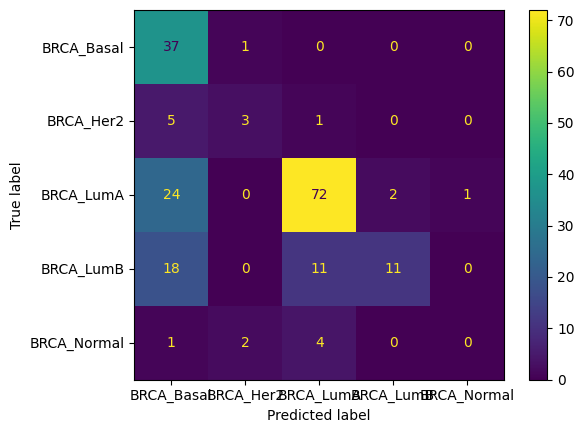

In [36]:
svm_model = make_pipeline(StandardScaler(), SVC(C=2))

# Fitting Model
svm_model.fit(X_train, y_train)

# Obtaining prediction
y_pred_svm = svm_model.predict(X_test)

# Getting the Confusion Matrix
svm_conf_mat = confusion_matrix(y_test, y_pred_svm, labels= svm_model.classes_)
ConfusionMatrixDisplay(svm_conf_mat, display_labels=svm_model.classes_).plot()

In [44]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate and store the F1 score
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')  # Adjust the `average` parameter as needed for your problem

# Calculate and store the accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Display the values
print(f"F1 Score: {svm_f1}")
print(f"Accuracy: {svm_accuracy}")


F1 Score: 0.6181391519193725
Accuracy: 0.6373056994818653


## <span style="color:#7E9FB8;"> SVM Observations </span>
- The matrix shows that this model is just simply worse than the random forest model in any subtype classiffication 

<a id="9"></a>
# <span style="color:#1F618D;">Logistic Regression Model</span>

## <span style="color:#7E9FB8;"> Training Logistic Regression </span>

In [37]:
from sklearn.linear_model import LogisticRegression


log_class = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, solver="saga",max_iter=200))
log_class.fit(X_train, y_train)
log_class.score(X_test, y_test)

C:\Users\ahmed\.pyenv\pyenv-win\versions\3.11.7\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.844559585492228

## <span style="color:#7E9FB8;">LogRegression Confusion Matrix<span>

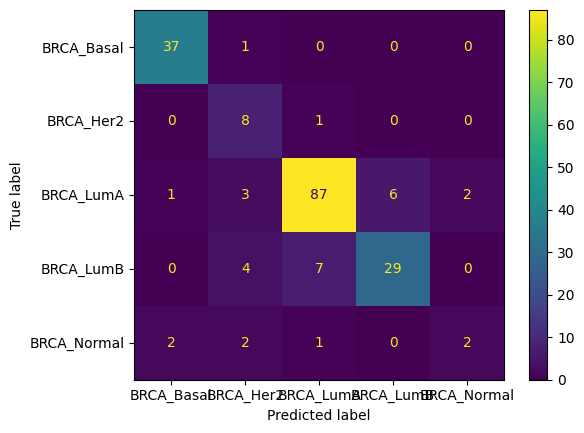

In [38]:
y_pred_log = log_class.predict(X_test)
log_conf_mat = confusion_matrix(y_test, y_pred_log, labels= log_class.classes_)
ConfusionMatrixDisplay(log_conf_mat, display_labels=log_class.classes_).plot()

In [45]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate and store the F1 score
f1_log = f1_score(y_test, y_pred_log, average='weighted')  # Adjust the `average` parameter as needed for your problem

# Calculate and store the accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)

# Display the values
print(f"F1 Score (Logistic Regression): {f1_log}")
print(f"Accuracy (Logistic Regression): {accuracy_log}")


F1 Score (Logistic Regression): 0.8456055171081077
Accuracy (Logistic Regression): 0.844559585492228


## <span style="color:#7E9FB8;">LogRegression Observation<span>
- It performs second to Random Forest. 
- It also have a hard time classifying `BRCA_LumA` and `BRCA_lumB` and `BRCA_Normal`

<a id="10"></a>
# <span style="color:#1F618D;">Ensembling The Models</span>

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rf_clf = RandomForestClassifier(max_depth=10, random_state=0)
svm_clf = make_pipeline(StandardScaler(), SVC(C=2))
log_clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, solver="saga",max_iter=200))

ensembl_clf= VotingClassifier(
    estimators = [("rf", rf_clf), ("log", log_clf)],
    voting="hard"
)


In [40]:
ensembl_clf.fit(X_train, y_train)

C:\Users\ahmed\.pyenv\pyenv-win\versions\3.11.7\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=0)),
                             ('log',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(max_iter=200,
                                                                  random_state=0,
                                                                  solver='saga'))]))])

In [41]:
ensembl_clf.score(X_test, y_test)

0.844559585492228

In [48]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set using the ensemble classifier
y_pred_ensemble = ensembl_clf.predict(X_test)

# Calculate F1 score and accuracy
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')  # Adjust `average` as needed
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

# Display the results
print(f"F1 Score (Voting Classifier): {f1_ensemble}")
print(f"Accuracy (Voting Classifier): {accuracy_ensemble}")


F1 Score (Voting Classifier): 0.8288896813576389
Accuracy (Voting Classifier): 0.844559585492228


Unfortunately, even though the ensemble has a good accuracy rate, it does not outperform the best model, random forest

<a id="11"></a>
# <span style="color:#1F618D;">Comparison of the models</span>

In [56]:
model_scores = [accuracy_rf, 
                svm_accuracy,
                accuracy_log, 
               accuracy_ensemble,
               gt_accuracy,
               gcn_final_accuracy,
               mm_accuracy]
models = pd.DataFrame({"Model": ["Random Forest", "SVM", "Logistic", "Ensemble","Transformer-based model","GCN","Multi-modal"],
              "Accuracy": model_scores})
models

,Model,Accuracy
0,Random Forest,0.865285
1,SVM,0.637306
2,Logistic,0.844560
3,Ensemble,0.844560
4,Transformer-based model,0.818653
5,GCN,0.668394
6,Multi-modal,0.854922


In [57]:
alt.Chart(models).mark_bar().encode(
    x="Model",
    y="Accuracy",
    color= "Model",
    tooltip = ["Model","Accuracy"]
).properties(
    title="Model Vs Accuracy", 
    width= 200,
    height= 300
)

alt.Chart(...)

In [51]:
model_scores = [f1_rf, 
                svm_f1,
                f1_log, 
               f1_ensemble,
               gt_f1,
               gcn_f1,
               mm_f1]
models = pd.DataFrame({"Model": ["Random Forest", "SVM", "Logistic", "Ensemble","Transformer-based model","GCN","Multi-modal"],
              "F1": model_scores})
models

,Model,F1
0,Random Forest,0.845685
1,SVM,0.618139
2,Logistic,0.845606
3,Ensemble,0.828890
4,Transformer-based model,0.809151
5,GCN,0.662000
6,Multi-modal,0.858262


In [54]:
alt.Chart(models).mark_bar().encode(
    x="Model",
    y="F1",
    color= "Model",
    tooltip = ["Model","F1"]
).properties(
    title="Model Vs F1", 
    width= 200,
    height= 300
)

alt.Chart(...)

# Multi Modal is the most preferred Model!!
It had similar accuracy and f1 scores with Random Forest but the computational efficiency of Multi Modal Network is better.